In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

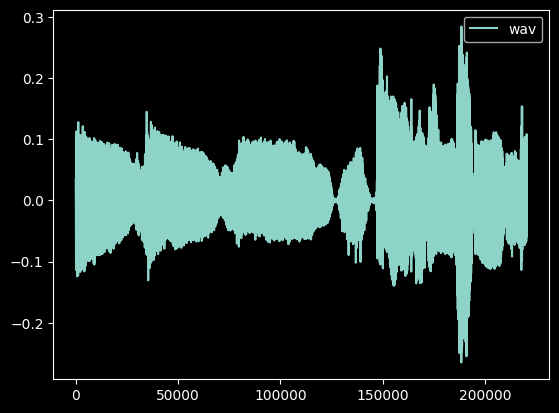

In [4]:
AUDIO_PATH = '/home/yytung/projects/MixingSecrets/dataset/Plums/raw_tracks/06_LeadVox.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = wav[sr*15:sr*20]
sf.write('test.wav', wav, sr)
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Chorus

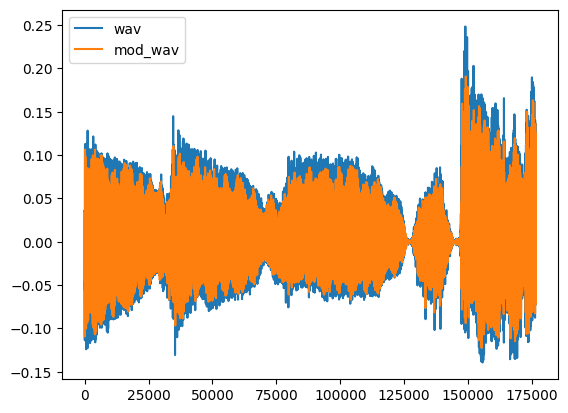

In [3]:
from diffFx_pytorch.processors.modulation import Chorus      
DSP_PARAMS = {
    'delay_ms': 20.0,  # 20ms base delay
    'rate': 2.0,       # 2 Hz modulation
    'depth': 0.2,     # Moderate intensity
    'mix': 0.8         # Equal mix
}

Processor = Chorus(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze().cpu().numpy(),      label='mod_wav')
plt.legend()

## MultiVoice Chorus

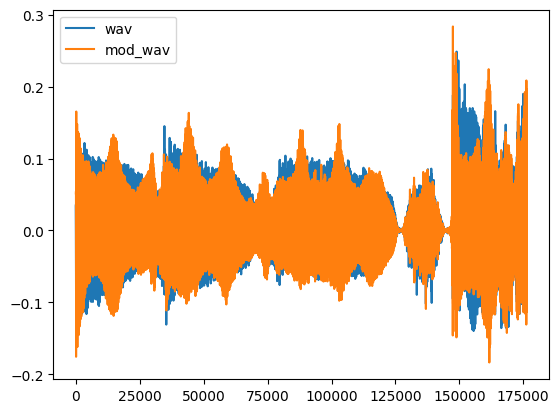

In [4]:
from diffFx_pytorch.processors.modulation import MultiVoiceChorus      
DSP_PARAMS = {
    'delay_ms': 5.0,    # Base delay
    'rate': 1.5,        # Modulation rate
    'depth': 0.15,      # Moderate detuning
    'mix': 0.7,         # Mostly wet
    'g0': 1.0,          # Full level voice 1
    'g1': 0.8,          # Reduced voice 2
}

Processor = MultiVoiceChorus(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze().cpu().numpy(),      label='mod_wav')
plt.legend()

## Stereo Chorus

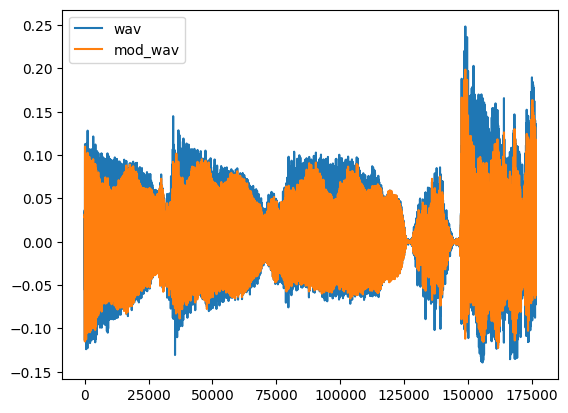

In [5]:
from diffFx_pytorch.processors.modulation import StereoChorus      
DSP_PARAMS = {
    'delay_ms': 5.0,    # Base delay
    'rate': 1.5,        # Modulation rate
    'depth': 0.15,      # Moderate detuning
    'mix': 0.7,         # Mostly wet
    'g0': 1.0,          # Full voice 1
    'pan0': -0.7,       # Voice 1 left
    'g1': 0.8,          # Reduced voice 2
    'pan1': 0.7         # Voice 2 right
}

Processor = StereoChorus(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav_stereo = torch.cat([test_wav, test_wav], dim=1)
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze()[0, ...].cpu().numpy(),      label='mod_wav')
plt.legend()

## Flanger

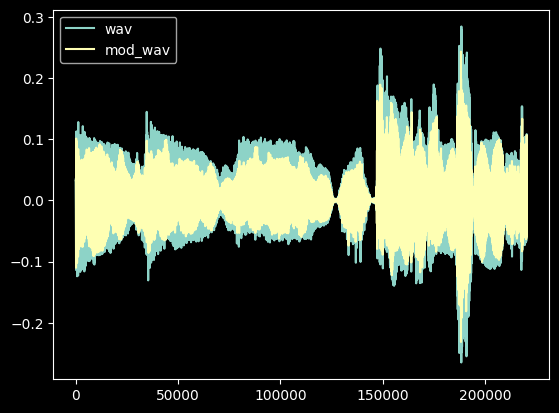

In [10]:
from diffFx_pytorch.processors.modulation import Flanger  
DSP_PARAMS = {
    'delay_ms': 6.0,    # Increased range
    'rate': 1,         # More musical range
    'depth': 0.6,        # Full range
    'mix': 0.7
}

Processor = Flanger(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze().cpu().numpy(),      label='mod_wav')
plt.legend()

## Feedback Flanger

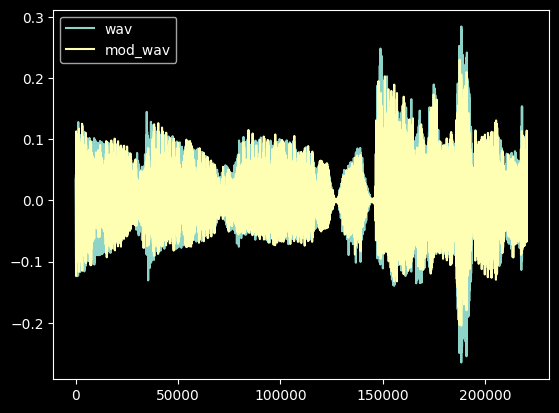

In [23]:
from diffFx_pytorch.processors.modulation import FeedbackFlanger  
DSP_PARAMS = {
    'delay_ms': 20.0,    # Increased range
    'rate': 1.0,         # More musical range
    'depth': 0.9,        # Full range
    'feedback': 0.4,
    'mix': 0.5
}

Processor = FeedbackFlanger(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze().cpu().numpy(),      label='mod_wav')
plt.legend()

## Stereo Flanger

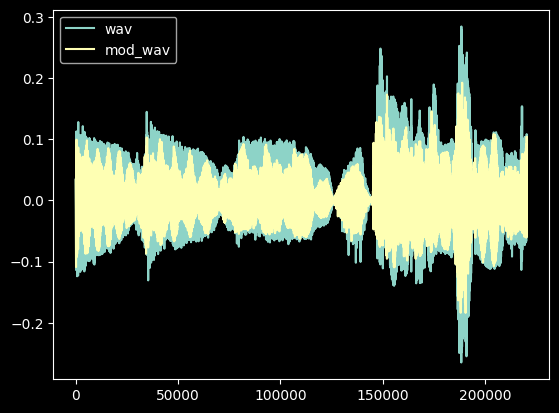

In [20]:
from diffFx_pytorch.processors.modulation import StereoFlanger  
DSP_PARAMS = {
    'delay_ms': 50.0,    # Increased range
    'rate': 0.1,         # More musical range
    'depth': 1.0,        # Full range
    'mix': 0.5
}

Processor = StereoFlanger(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav_stereo = torch.cat([test_wav, test_wav], dim=1)
mod_wav = Processor(test_wav_stereo, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze()[0,...].cpu().numpy(),      label='mod_wav')
plt.legend()

## Phaser

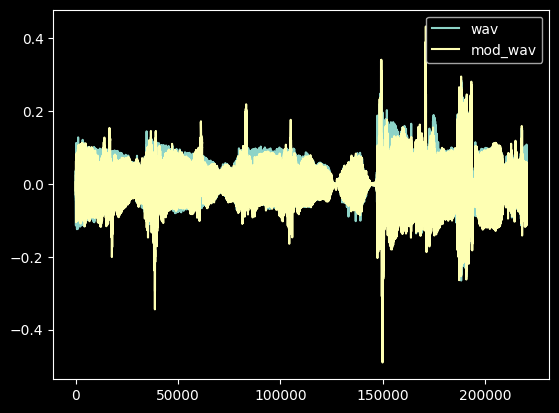

In [35]:
from diffFx_pytorch.processors.modulation import Phaser
DSP_PARAMS = {
    'f0': 2,       # LFO frequency (Hz)
    'f_min': 100.0,  # Min cutoff freq (Hz)
    'f_max': 2000.0, # Max cutoff freq (Hz)
    'feedback': 0.0,   # Feedback amount
    'wet_mix': 1.0,    # Wet/dry mix
}

Processor = Phaser(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
# test_wav_stereo = torch.cat([test_wav, test_wav], dim=1)
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze().cpu().numpy(),      label='mod_wav')
plt.legend()